**PART ONE : IMPLEMENTING K MEANS ALGORITHM**

In [1]:
from keras.datasets import cifar10
import random
import numpy as np

import cv2
(trainX, trainy), (testX, testy) = cifar10.load_data()

**All the functions required to :** 


1.   Load the Data and Preprocess it
2.   Find the Clusters using the Eucledian Distance
3.   Adjusting the Centroids



In [2]:
def load_dataSet_and_preprocess():
  (trainX, trainy), (testX, testy) = cifar10.load_data()
  print("-----------------Initial Sizes of the datasets--------------------------")
  train_X = testX
  train_Y = testy 
  print("Using the testing data of the dataset as our training data ", train_X.shape)
  print("----------------- After conversion to Gray Scale --------------------------")
  train_X = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_X])
  print("Training Data Size ", train_X.shape)
  #Preprocessing the Dataset : Normalising
  train_X = train_X.astype('float32') / 255
  # Flattening the images
  train_X = train_X.reshape((-1, 32*32))
  print("After Reshape Dataset size is ", train_X.shape)
  return train_X , train_Y

def find_clusters(train_X, centroids_temp):
  cluster_array = []
  eucledian_distance_array = []
  for i in train_X:
    for centroid in centroids_temp:
        eucledian_distance_array.append(np.sqrt(np.dot(i-centroid, i-centroid)))
    min_distance = min(eucledian_distance_array)
    position = eucledian_distance_array.index(min_distance)
    cluster_array.append(position)
    eucledian_distance_array.clear()

  return np.array(cluster_array)


def adjust_centroids(train_X, cluster_group):
  new_centroids= []
  cluster_type = np.unique(cluster_group)
  for type1 in cluster_type:
    new_centroids.append(train_X[cluster_group == type1].mean(axis=0))
  return np.array(new_centroids)




**Defining the No of Clusters and the Iterations**

In [3]:
no_cluster =10
no_iterations = 100

**Main Function to Calculate the Dunn Index and the silhouette_score**

In [4]:
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

(trainX, trainy), (testX, testy) = cifar10.load_data()
train_X , train_Y = load_dataSet_and_preprocess();

index = random.sample(range(0, train_X.shape[0]), no_cluster )
centroid_main = train_X[index]
print("Randomly selected Centroid is", centroid_main)


for i in range (100):
  cluster_group = find_clusters(train_X, centroid_main)
  temp_centroids = centroid_main
  centroid_main = adjust_centroids(train_X, cluster_group)
  print("Comparing computed centroid with previous centroid" , temp_centroids , " and ", centroid_main)
  if(temp_centroids == centroid_main).all():
    break

silhouette_avg = silhouette_score(train_X, cluster_group)
print("Clusters = ", no_cluster,
          " The average silhouette_score is :", silhouette_avg)




-----------------Initial Sizes of the datasets--------------------------
Using the testing data of the dataset as our training data  (10000, 32, 32, 3)
----------------- After conversion to Gray Scale --------------------------
Training Data Size  (10000, 32, 32)
After Reshape Dataset size is  (10000, 1024)
Randomly selected Centroid is [[0.99215686 0.9137255  0.8156863  ... 0.8235294  0.8666667  0.9647059 ]
 [0.5019608  0.49803922 0.50980395 ... 0.69411767 0.69411767 0.7176471 ]
 [0.1882353  0.19215687 0.20392157 ... 0.08235294 0.08235294 0.07843138]
 ...
 [0.04313726 0.05490196 0.06666667 ... 0.21960784 0.19215687 0.17254902]
 [0.14117648 0.22352941 0.2509804  ... 0.36078432 0.3019608  0.2627451 ]
 [1.         0.94509804 0.92156863 ... 0.8        0.8745098  0.94509804]]
Comparing computed centroid with previous centroid [[0.99215686 0.9137255  0.8156863  ... 0.8235294  0.8666667  0.9647059 ]
 [0.5019608  0.49803922 0.50980395 ... 0.69411767 0.69411767 0.7176471 ]
 [0.1882353  0.19215

In [5]:
!pip install validclust

from sklearn.metrics import pairwise_distances
from validclust import dunn

dist = pairwise_distances(train_X)
print("Dunn Index  is ", dunn(dist, cluster_group))



Dunn Index  is  0.0912171


------------------------------------------------------------------------------- PART TWO : AUTOENCODER
-----------------------------------

**Preprocessing the Data**

In [13]:
from keras.datasets import cifar10
from keras.models import Model , Sequential
from keras.layers import Input , Conv2D , Conv2DTranspose , MaxPool2D
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

# Load Data from Dataset
(x_train, y_train), (x_test, y_train) = cifar10.load_data()

#Change to GreyScale
changeToGrey = lambda data : np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in data])
x_train = changeToGrey(x_train)
x_test = changeToGrey(x_test)



**ENCODER**

In [7]:
image_dimension = Input(shape=(32,32,1))
x = layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(image_dimension)
x = layers.MaxPooling2D((2, 2), strides=2,padding='valid')(x)
x = layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), strides=2,padding='valid')(x)

**DECODER**

In [8]:
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
decoded = layers.Conv2D(1, (3, 3), strides=1, activation='linear', padding='same')(x)

**MODEL**

In [9]:
autoencoder = Model(image_dimension, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=100)

Epoch 1/10
500/500 [==============================] - 10s 16ms/step - loss: 923.2809
Epoch 2/10
500/500 [==============================] - 8s 16ms/step - loss: 221.7388
Epoch 3/10
500/500 [==============================] - 8s 16ms/step - loss: 180.9428
Epoch 4/10
500/500 [==============================] - 8s 16ms/step - loss: 159.8351
Epoch 5/10
500/500 [==============================] - 8s 16ms/step - loss: 146.6233
Epoch 6/10
500/500 [==============================] - 8s 16ms/step - loss: 136.9431
Epoch 7/10
500/500 [==============================] - 8s 16ms/step - loss: 130.3890
Epoch 8/10
500/500 [==============================] - 8s 16ms/step - loss: 124.6970
Epoch 9/10
500/500 [==============================] - 8s 16ms/step - loss: 119.4550
Epoch 10/10
500/500 [==============================] - 8s 16ms/step - loss: 116.1863


**APPLYING K MEANS TO THE ENCODED LAYER**

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
encoder = Model(inputs=image_dimension, outputs=encoded)
encodedr_Trained = encoder.predict(x_test)

encodedr_Trained =encodedr_Trained.reshape(-1,8*8*32)

kMeans_Algo = KMeans(n_clusters=10, init='random', max_iter=300, random_state=0)
kMeans_Output = kMeans_Algo.fit_predict(encodedr_Trained)



**CALCULATING SILHOUETTE_SCORE**

In [11]:
silhoutte_score_part2 = silhouette_score(x_test.reshape(10000, 32*32), kMeans_Output)
print("Clusters = 10 , The silhouette_score is :", silhoutte_score_part2)

Clusters = 10 , The silhouette_score is : 0.043691194095152396


**IMAGE COMPARISON**

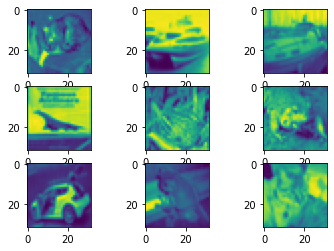

Clusters = 10 , The silhouette_score is : 0.043691194095152396
-------------------Comparing Test Images with Reconstructed Images--------------------------


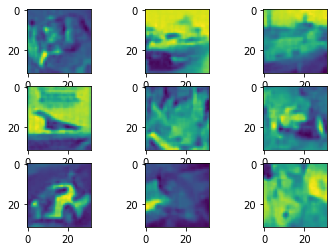

In [12]:
from matplotlib import pyplot
# Subplot will be in the range 331 to 339. Ref: https://stackoverflow.com/questions/69298170/what-are-the-parameters-of-pyplot-subplot
for i in range(9):
    pyplot.subplot(331+i)
    pyplot.imshow(x_test[i])
pyplot.show()


print("Clusters = 10 , The silhouette_score is :", silhoutte_score_part2)
print("-------------------Comparing Test Images with Reconstructed Images--------------------------")
output_images = autoencoder.predict(x_test)
for i in range(9):
    pyplot.subplot(331 + i)
    pyplot.imshow(output_images[i].reshape(32,32))
pyplot.show()
